# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Through this project, I will try to scrap exchange rate Indonesian Rupiahs (IDR) per US Dollar (USD) data's from the exchange rates website. Exchange-Rates.org is a website that allows us to check the latest foreign exchange rates. Data on this website is up-to-date and provided by one of the financial leaders. I will scrap data historical exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) in the time frame from 1/10/2022 until 7/7/2022. The data shows the value of 1 USD in IDR and the information that i need is the date and the price per day. My purpose with scrap this website is to complete my capstone project as a student in data analytics specialization at Algoritma Data Science Academy.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

The key step in web scraping is to find the right key to scrap the data. If I can find the right key, I can extract the right information from the website. The first step to find the right key is go back on the website page. The informations that I need is contained in the table, to know which part of the code refer to that table, I can just move my cursor there, click on the right, and inspect element. Then I will see something like this.

<img src="dokumentasi.jpg">


From the picture, I can know that i need to find the line table with tag `div` and class `table-responsive`. So, I will put the key into the method `.find()`at my beautifusoup object.

In [4]:
data = soup.find('div', attrs={'class':'table-responsive'})
print(data.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/8/2022
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-8-2022">
      14,976.95000
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-8-2022">
      USD IDR rate for 7/8/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/7/2022
    </td>
    <td>
 


Finding row length.

In [5]:
rowdata = data.find_all('tr')
row_length = len(rowdata)
row_length

130

The next step is do srapping. I use looping `for` to write all information that needed. Then, I establish a placeholder to receive the information that I scrap and its name is `temp`. The range of looping `for` start from 0 until 130 (from one until the the length of the table row). 

There are 3 steps that I did to scrapping this website
- Take data from all rows completely
- Take data that contain date from all rows
- take data that contain price from all rows 

After that, I will append it to our tuple that I prepared before and I change the order from oldest to newest. Let's see this code!

In [6]:
temp = [] #initiating a tuple

for i in range(0, 130):
    exchange = data.find_all('tr')[i] #1 take data from all rows completely
    
    date = exchange.find_all('td')[0].text #2 take data that contain date from all rows
    
    price = exchange.find_all('td')[2].text #3 take data that contain price from all rows
    
    temp.append((date,price))
temp

[('7/8/2022', '14,976.95000 IDR'),
 ('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/

In [7]:
temp = temp[::-1]
temp

[('1/10/2022', '14,290.15000 IDR'),
 ('1/11/2022', '14,284.46501 IDR'),
 ('1/12/2022', '14,298.95000 IDR'),
 ('1/13/2022', '14,309.00000 IDR'),
 ('1/14/2022', '14,314.55000 IDR'),
 ('1/17/2022', '14,331.25000 IDR'),
 ('1/18/2022', '14,358.70000 IDR'),
 ('1/19/2022', '14,362.85000 IDR'),
 ('1/20/2022', '14,327.60000 IDR'),
 ('1/21/2022', '14,329.75000 IDR'),
 ('1/24/2022', '14,350.70000 IDR'),
 ('1/25/2022', '14,330.55000 IDR'),
 ('1/26/2022', '14,366.45000 IDR'),
 ('1/27/2022', '14,395.00000 IDR'),
 ('1/28/2022', '14,383.40000 IDR'),
 ('1/31/2022', '14,339.40000 IDR'),
 ('2/1/2022', '14,328.30000 IDR'),
 ('2/2/2022', '14,355.35000 IDR'),
 ('2/3/2022', '14,387.00000 IDR'),
 ('2/4/2022', '14,400.70000 IDR'),
 ('2/7/2022', '14,394.90000 IDR'),
 ('2/8/2022', '14,386.75000 IDR'),
 ('2/9/2022', '14,334.30000 IDR'),
 ('2/10/2022', '14,357.00000 IDR'),
 ('2/11/2022', '14,344.75000 IDR'),
 ('2/14/2022', '14,303.45000 IDR'),
 ('2/15/2022', '14,265.45000 IDR'),
 ('2/16/2022', '14,274.45000 IDR'),

## Creating data frame & Data wrangling

Put the array into dataframe and add the name of the columns use parameter `columns=("")`

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date', 'Price (IDR)'))
df.head()

,Date,Price (IDR)
0,1/10/2022,"14,290.15000 IDR"
1,1/11/2022,"14,284.46501 IDR"
2,1/12/2022,"14,298.95000 IDR"
3,1/13/2022,"14,309.00000 IDR"
4,1/14/2022,"14,314.55000 IDR"


Do the data cleaning
- Check the datatypes and change datatypes that still not quite right. Datatype Date is changed to datetime64 and datatype Price to float64. In here, I use method `.astype()`. Before I change datatype of Price, I change the "IDR" to " " and the "," to " " with method `.str.replace()`
- I make new columns that is Month, because in data visualization, I want to make  visualization for each month. I use method `.dt.month_name` and then I change the datatype of Month to category.
- Set 'Date' as index with method `.set_index()`.
- Check missing value with method `.isna().sum()`.

In [9]:
#1
df.dtypes

Date           object
Price (IDR)    object
dtype: object

In [10]:
#change type of date from Date
df['Date'] = df['Date'].astype('datetime64')

#Remove string IDR, replace (,) to (), and change type of data from Price
df['Price (IDR)'] = df['Price (IDR)'].str.replace('IDR', '')
df['Price (IDR)'] = df['Price (IDR)'].str.replace(',', '')
df['Price (IDR)'] = df['Price (IDR)'].astype('float64')

df.dtypes

Date           datetime64[ns]
Price (IDR)           float64
dtype: object

In [11]:
#2
df['Month'] = df["Date"].dt.month_name()
df['Month'] = df['Month'].astype('category')

In [12]:
#3
df = df.set_index('Date')
df.head(2)

,Price (IDR),Month
Date,,
2022-01-10,14290.15000,January
2022-01-11,14284.46501,January


In [13]:
#4
df.isna().sum()

Price (IDR)    0
Month          0
dtype: int64

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 


After I do data cleaning and data is already, next I make data visualisation to share the informations visually. Because the datatype of Price is float64, I choose line plot to this data visualisation. I use method `.plot()` and the default will shows line plot.

In [14]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:xlabel='Date'>

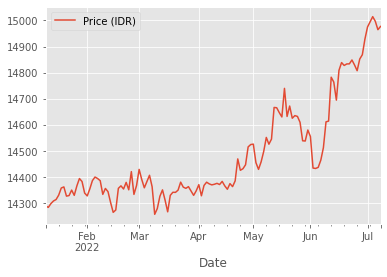

In [15]:
df.plot.line()

<AxesSubplot:xlabel='Date'>

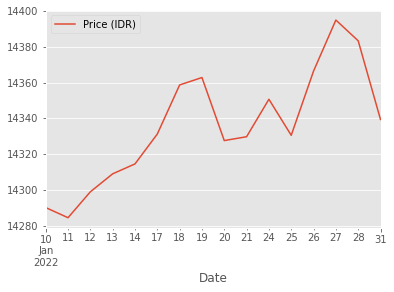

In [16]:
df[df['Month']== 'January'].plot()

<AxesSubplot:xlabel='Date'>

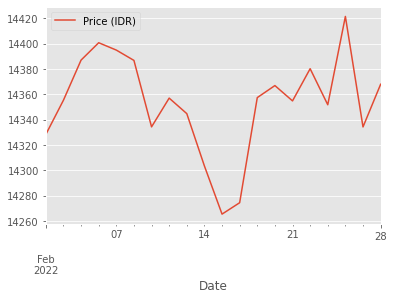

In [17]:
df[df['Month']== 'February'].plot()

<AxesSubplot:xlabel='Date'>

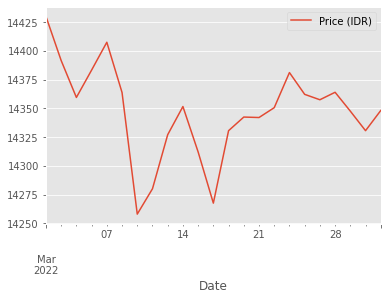

In [18]:
df[df['Month']== 'March'].plot()

<AxesSubplot:xlabel='Date'>

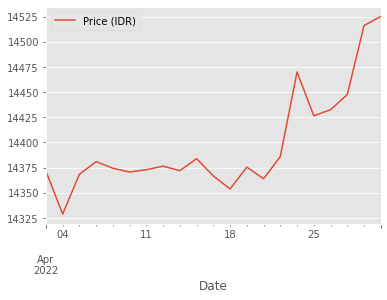

In [19]:
df[df['Month']== 'April'].plot()

<AxesSubplot:xlabel='Date'>

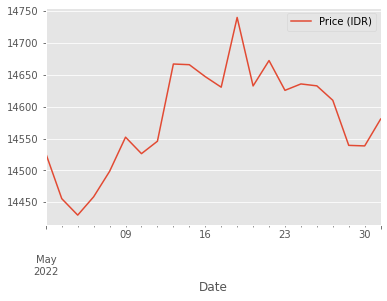

In [20]:
df[df['Month']== 'May'].plot()

<AxesSubplot:xlabel='Date'>

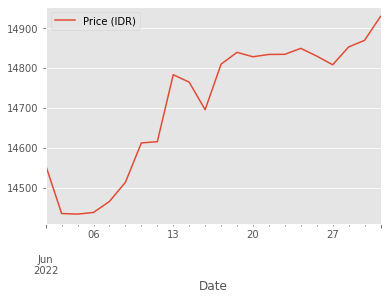

In [21]:
df[df['Month']== 'June'].plot()

<AxesSubplot:xlabel='Date'>

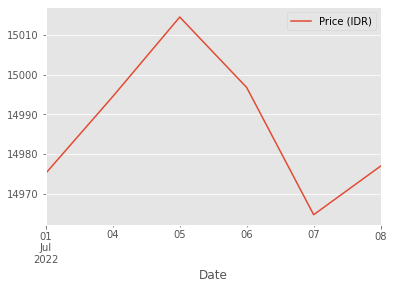

In [22]:
df[df['Month']== 'July'].plot()

#### Conclusion ####

From the data, I can conclude that in the time frame from 01/10/2022 until 7/7/2022
- The highest of exchange rates USD in IDR occurred on the 5th of July and the lowest is occured on March. 
- The highest decline of exchange rates occurred between on May and June. 
- The highest price USD in IDR reach more than IDR 15000 and the lowest price USD in IDR reach around IDR 14200.
- The exchange rate in each month in that time frame tends to always move (decline and increase) and is rarely stable.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.